## How to make an energy level diagram (for astronomy)
### Written by Alyssa Bulatek on 1/10/23 

Uses the package [`PyEnergyDiagrams` from giacomomarchioro on GitHub](https://github.com/giacomomarchioro/PyEnergyDiagrams).

In [8]:
# Access energy level information from LAMDA
from astroquery.lamda import Lamda

# You can get the list of molecuels LAMDA uses by running the following line
# print(Lamda.molecule_dict)

# Get energy levels for CH3OH, A ladder 
collrates, radtransitions, enlevels = Lamda.query(mol='ch3oh_a')
# print(enlevels) # This prints out the table of indices, energies, weights, and Js
# Js are given as e.g. 2_0 or 1_-1
# I would have personally written the J column to be in two separate columns (J and K), no shade Brian

j_and_k = enlevels['J'] # Needs to be parsed
energies = enlevels['Energy']

# Divide j_and_k into Js and Ks separately
js, ks = map(list, zip(*[combo.split('_') for combo in j_and_k]))
js_int = [int(j) for j in js]
ks_int = [int(k) for k in ks]

In [9]:
# Build a more useful table of energies
from astropy.table import Table
import astropy.units as u

tbl = Table([js_int, ks_int, energies*u.K], names=('J', 'K', 'Energy'))
tbl_lowE = tbl[tbl['Energy'] < 100*u.K] # Use an energy cutoff so we don't make plot too tall

In [10]:
# Separate into K levels
tbl_lowE_K0 = tbl_lowE[tbl_lowE['K'] == 0]
tbl_lowE_K1 = tbl_lowE[tbl_lowE['K'] == 1]
tbl_lowE_K2 = tbl_lowE[tbl_lowE['K'] == 2]
tbl_lowE_Km1 = tbl_lowE[tbl_lowE['K'] == -1]

In [11]:
# Matplotlib setup
import matplotlib.pyplot as plt

SM_SIZE = 8
MD_SIZE = 12
LG_SIZE = 14

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

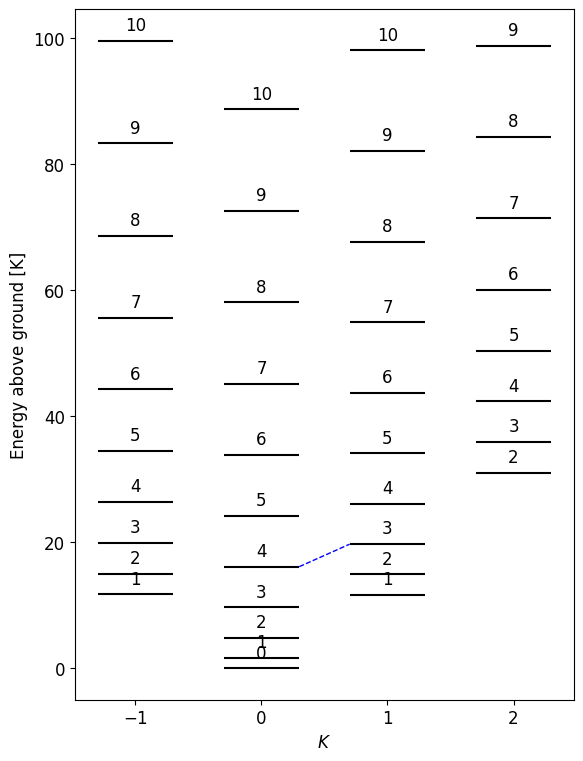

In [12]:
# Initialize energy level diagram and put levels on it
from energydiagram import ED

# This allegedly should allow me to change the figure size but I'm not sure it does anything
fig = plt.figure(figsize = (6, 20))

# Make a diagram
d = ED()

# Add levels for k = -1
d.add_level(tbl_lowE_Km1[0]['Energy'], '', top_text = tbl_lowE_Km1[0]['J']) # Have to start the column
for level in tbl_lowE_Km1[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = level['J']) # Then do the rest of the column

# Add levels for k = 0
d.add_level(tbl_lowE_K0[0]['Energy'], '', top_text = tbl_lowE_K0[0]['J'])
for level in tbl_lowE_K0[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = level['J'])
    
# Add levels for k = 1
d.add_level(tbl_lowE_K1[0]['Energy'], '', top_text = tbl_lowE_K1[0]['J'])
for level in tbl_lowE_K1[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = level['J'])
    
# Add levels for k = 2
d.add_level(tbl_lowE_K2[0]['Energy'], '', top_text = tbl_lowE_K2[0]['J'])
for level in tbl_lowE_K2[1:]:
    d.add_level(level['Energy'], '', 'last', top_text = level['J'])

# Set up spacings? Isn't working as I expect it to; lower numbers seems to make larger sizes
d.dimension = 12 # Should be width of line
d.offset = 1 # Should be height of line/text
d.space = 8 # Should be horizontal space between columns

# Add connections between lines to mark transitions
# First two args are indices, need to run d.plot(show_IDs = True) to see the indices for each level
d.add_link(14, 23, color = 'b') # 107 GHz
# Can't do the 108 GHz transition because it's on the E ladder

d.plot(show_IDs = False, ax = fig.gca()) # Have to do this to create the plot

# Set up y-label
d.ax.set_ylabel('Energy above ground [K]')
# Make more spines visible
d.ax.spines['bottom'].set_visible(True)
d.ax.spines['top'].set_visible(True)
d.ax.spines['right'].set_visible(True)
# Set up x-label
d.ax.axes.get_xaxis().set_visible(True)
d.ax.set_xlabel(f'$K$')
d.ax.set_xticks([26, 46, 66, 86], ['$-1$', '0', '1', '2']) # This is really hacky so be careful
# I don't actually understand how the x-axis gets set in the first place
# So I figured it would be fine to just overwrite it

# Output figure into Overleaf directory
fig.tight_layout()
# plt.savefig("632e0742965a6e88270d73d7/figures/energy_level_diagram.pdf", bbox_inches = 'tight')
# plt.savefig("632e0742965a6e88270d73d7/figures/energy_level_diagram.png", dpi = 250, bbox_inches = 'tight')